# **IMPORT Librerias**

In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "PDT_2022_PUB_MRUN.csv"

In [3]:
# Lectura del Archivo CSV
encodings_to_try = ['latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file using encoding: {encoding}")
        break  # Si la lectura es exitosa, prosigue
    except UnicodeDecodeError:
        print(f"Failed to read the file using encoding: {encoding}")


Successfully read the file using encoding: latin-1


C:\Users\Sebastian Antunez N\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3505: DtypeWarning: Columns (34,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## **2. Preprocesamiento de datos:**

**Columnas Importantes**

In [4]:
df = data[['SEXO', 'EDUCACION_MADRE', 'COMPLETO_EDUCACION_MADRE', 'EDUCACION_PADRE', 'COMPLETO_EDUCACION_PADRE', 'TIENE_TRABAJO_REM', 'OCUPACION_2',
           'OCUPACION_3', 'HORARIO_TRABAJO', 'CON_QUIEN_VIVE_1', 'CON_QUIEN_VIVE_2', 'CON_QUIEN_VIVE_3',  'CON_QUIEN_VIVE_5', 'CON_QUIEN_VIVE_6',  'CON_QUIEN_VIVE_7',
            'CON_QUIEN_VIVE_8', 'CON_QUIEN_VIVE_9', 'CON_QUIEN_VIVE_10', 'ESTUDIO_INSTITUCION_SUPERIOR', 'TIPO_INSTITUCION', 'INGRESO_PERCAPITA_GRUPO_FA',
            'HOGAR_CONEXION_INTERNET', 'CONEXION_INSUFICIENTE', 'TITULACION_CARRERA', 'ECONOMICAMENTE', 'PERSONAS_ESTUDIAN_SUP', 'DISPOSITIVO_1', 'USO_DISPOSITIVO_3']]

In [5]:
df.shape

(285513, 28)

**Eliminacion de valores faltantes**

In [6]:
data = df[df['TITULACION_CARRERA'].str.strip() != '']
# data = df
data.shape

(29626, 28)

In [7]:
# Columnas de nuestra fuente de datos
df.columns

Index(['SEXO', 'EDUCACION_MADRE', 'COMPLETO_EDUCACION_MADRE',
       'EDUCACION_PADRE', 'COMPLETO_EDUCACION_PADRE', 'TIENE_TRABAJO_REM',
       'OCUPACION_2', 'OCUPACION_3', 'HORARIO_TRABAJO', 'CON_QUIEN_VIVE_1',
       'CON_QUIEN_VIVE_2', 'CON_QUIEN_VIVE_3', 'CON_QUIEN_VIVE_5',
       'CON_QUIEN_VIVE_6', 'CON_QUIEN_VIVE_7', 'CON_QUIEN_VIVE_8',
       'CON_QUIEN_VIVE_9', 'CON_QUIEN_VIVE_10', 'ESTUDIO_INSTITUCION_SUPERIOR',
       'TIPO_INSTITUCION', 'INGRESO_PERCAPITA_GRUPO_FA',
       'HOGAR_CONEXION_INTERNET', 'CONEXION_INSUFICIENTE',
       'TITULACION_CARRERA', 'ECONOMICAMENTE', 'PERSONAS_ESTUDIAN_SUP',
       'DISPOSITIVO_1', 'USO_DISPOSITIVO_3'],
      dtype='object')

# **3. Ingenieria de Funciones:**

In [8]:
# Correlacion
df.corr()

,SEXO,TIENE_TRABAJO_REM,HORARIO_TRABAJO,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
SEXO,1.000000,-0.047913,0.039621,-0.031533,-0.047966
TIENE_TRABAJO_REM,-0.047913,1.000000,-0.156470,0.352436,0.251319
HORARIO_TRABAJO,0.039621,-0.156470,1.000000,-0.122268,0.001098
ECONOMICAMENTE,-0.031533,0.352436,-0.122268,1.000000,0.280600
PERSONAS_ESTUDIAN_SUP,-0.047966,0.251319,0.001098,0.280600,1.000000


**Codificacion de variables categóricas**:

Convercion de datos categóricos a formato numérico utilizando técnicas como la codificación one-hot o la codificación de etiquetas.



In [9]:
# Assuming df_data is your DataFrame
df_data_encoded = data.copy()

# Label Encoding for ordinal columns
label_encoder = LabelEncoder()

In [10]:
for col in data.columns:
    df_data_encoded[col] = label_encoder.fit_transform(data[col].astype(str))

# Display the DataFrame after Label Encoding
df_data_encoded.head()

,SEXO,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,OCUPACION_2,OCUPACION_3,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,...,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP,DISPOSITIVO_1,USO_DISPOSITIVO_3
1,0,8,3,10,3,2,0,0,0,0,...,0,2,11,3,2,1,2,0,1,0
2,0,10,2,8,2,2,0,0,1,0,...,0,2,6,3,1,1,1,1,1,2
3,0,8,2,8,2,0,0,0,3,0,...,0,0,8,3,2,1,2,1,1,0
6,1,10,3,2,3,0,0,0,3,0,...,0,2,5,3,4,2,2,1,1,2
7,0,2,3,2,3,1,0,0,0,0,...,0,2,5,3,6,2,1,5,1,4


In [11]:
# Separate features from the dataset
X = df_data_encoded[df_data_encoded.columns]
X.fillna(0, inplace=True)
X.isnull().sum()

SEXO                            0
EDUCACION_MADRE                 0
COMPLETO_EDUCACION_MADRE        0
EDUCACION_PADRE                 0
COMPLETO_EDUCACION_PADRE        0
TIENE_TRABAJO_REM               0
OCUPACION_2                     0
OCUPACION_3                     0
HORARIO_TRABAJO                 0
CON_QUIEN_VIVE_1                0
CON_QUIEN_VIVE_2                0
CON_QUIEN_VIVE_3                0
CON_QUIEN_VIVE_5                0
CON_QUIEN_VIVE_6                0
CON_QUIEN_VIVE_7                0
CON_QUIEN_VIVE_8                0
CON_QUIEN_VIVE_9                0
CON_QUIEN_VIVE_10               0
ESTUDIO_INSTITUCION_SUPERIOR    0
TIPO_INSTITUCION                0
INGRESO_PERCAPITA_GRUPO_FA      0
HOGAR_CONEXION_INTERNET         0
CONEXION_INSUFICIENTE           0
TITULACION_CARRERA              0
ECONOMICAMENTE                  0
PERSONAS_ESTUDIAN_SUP           0
DISPOSITIVO_1                   0
USO_DISPOSITIVO_3               0
dtype: int64

In [12]:
# Extract numerical columns
numerical_columns = X.select_dtypes(include=['int']).columns
len(numerical_columns)

28

**Estandarizacion**

Estandarice los datos numéricos para garantizar que todas las funciones contribuyan por igual.

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize numerical features
df_data_encoded[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Display the scaled DataFrame
df_data_encoded.head()

,SEXO,EDUCACION_MADRE,COMPLETO_EDUCACION_MADRE,EDUCACION_PADRE,COMPLETO_EDUCACION_PADRE,TIENE_TRABAJO_REM,OCUPACION_2,OCUPACION_3,HORARIO_TRABAJO,CON_QUIEN_VIVE_1,...,ESTUDIO_INSTITUCION_SUPERIOR,TIPO_INSTITUCION,INGRESO_PERCAPITA_GRUPO_FA,HOGAR_CONEXION_INTERNET,CONEXION_INSUFICIENTE,TITULACION_CARRERA,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP,DISPOSITIVO_1,USO_DISPOSITIVO_3
1,-1.118425,0.139188,0.524149,0.717474,0.713694,1.196638,-0.367435,-0.571296,-2.006728,-0.653665,...,0.0,0.770839,1.453985,0.324249,-0.181234,-0.365832,2.364790,-0.898210,0.542265,-1.841012
2,-1.118425,0.628808,-0.595260,0.220673,-0.111820,1.196638,-0.367435,-0.571296,-1.137645,-0.653665,...,0.0,0.770839,0.093532,0.324249,-0.854913,-0.365832,0.862533,-0.074920,0.542265,-0.447648
3,-1.118425,0.139188,-0.595260,0.220673,-0.111820,-0.766787,-0.367435,-0.571296,0.600519,-0.653665,...,0.0,-1.892353,0.637713,0.324249,-0.181234,-0.365832,2.364790,-0.074920,0.542265,-1.841012
6,0.894115,0.628808,0.524149,-1.269731,0.713694,-0.766787,-0.367435,-0.571296,0.600519,-0.653665,...,0.0,0.770839,-0.178559,0.324249,1.166126,1.605815,2.364790,-0.074920,0.542265,-0.447648
7,-1.118425,-1.329672,0.524149,-1.269731,0.713694,0.214926,-0.367435,-0.571296,-2.006728,-0.653665,...,0.0,0.770839,-0.178559,0.324249,2.513485,1.605815,0.862533,3.218239,0.542265,0.945715


**1.** **Reducción de dimensionalidad**: utiliza PCA para reducir la dimensionalidad de los datos.

**2.** **Agrupación**: Aplica la agrupación K-Means para agrupar los datos en grupos.

**3.** **Evaluación**: Calcula la puntuación de silueta para evaluar la calidad de la agrupación.

**4.** **Interpretación** y Análisis: Analiza y muestra las características de cada cluster.

# **Reducción de dimensionalidad**
## PCA (Principal Component Analysis)

**Reducción de dimensionalidad:** Este código realiza PCA en el conjunto de datos codificados, reduciendo su dimensionalidad al número especificado de componentes (n_componentes). El conjunto de datos transformado (X_pca) contiene los componentes principales que capturan la variación más significativa en los datos originales. Esta reducción de dimensionalidad es útil para visualizar y analizar datos de alta dimensión o mejorar la eficiencia de los algoritmos de aprendizaje automático.

In [14]:
# Apply PCA
n_components =  5  # Number of components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_data_encoded)
X_pca

array([[ 2.80672141, -1.58652744, -0.74600613, -0.95562547, -2.12751606],
       [ 1.07765296, -0.34655891,  0.44344006,  0.19718697, -1.45663215],
       [ 2.40511779,  0.10030521,  0.0848818 , -0.54877006, -0.31821001],
       ...,
       [ 2.27582757,  0.3899841 , -0.75873522, -2.13261378, -1.73812812],
       [-0.89702059,  0.30149308,  0.40538165,  1.477601  , -0.77812183],
       [ 2.98736211, -0.2645038 ,  1.17956537,  0.98182214, -0.50630616]])

In [15]:
# Create a DataFrame with PCA components
pca_columns = [f"PC{i+1}" for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=pca_columns)
X_pca_df

,PC1,PC2,PC3,PC4,PC5
0,2.806721,-1.586527,-0.746006,-0.955625,-2.127516
1,1.077653,-0.346559,0.443440,0.197187,-1.456632
2,2.405118,0.100305,0.084882,-0.548770,-0.318210
3,1.772175,-0.990110,-0.933608,-1.883062,-0.058060
4,1.600332,-2.197068,0.526265,-1.748304,-0.168947
...,...,...,...,...,...
29621,-1.592296,-0.135153,0.540862,0.167549,-0.388588
29622,1.249475,0.729137,1.031952,-0.802682,2.706050
29623,2.275828,0.389984,-0.758735,-2.132614,-1.738128
29624,-0.897021,0.301493,0.405382,1.477601,-0.778122


In [16]:
# Print the explained variance ratio for each component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.12904084 0.08387289 0.06253829 0.0569404  0.04908279]


# **Clustering Analysis**

1. **Clustering:** Este código realiza una agrupación de K-Means en el conjunto de datos cuya dimensionalidad se ha reducido mediante PCA. Su objetivo es agrupar puntos de datos similares en grupos, y el número de grupos se especifica mediante el parámetro n_clusters.

In [17]:
# Clustering: Applying K-Means clustering algorithm
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)
clusters

C:\Users\Sebastian Antunez N\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 0, 1, 0])

2. **Evaluación:** Este código evalúa la calidad de los resultados de agrupación utilizando Silhouette Score, que es una métrica comúnmente utilizada para evaluar qué tan bien definidos están los grupos.

Este fragmento de código realiza una evaluación de los resultados de agrupación obtenidos de K-Means mediante el cálculo e impresión de Silhouette Score.








In [18]:
# Evaluation: Calculate Silhouette Score for clustering quality
silhouette_avg = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.28835270931671075


# **Interpretation and Analysis**

**Reduccion de dimensionalidad** Este código agrega etiquetas de conglomerados al conjunto de datos original, calcula los valores medios de las características de cada conglomerado y luego imprime un resumen de las características de cada conglomerado. Es un paso común en el análisis de agrupamiento obtener información sobre los diferentes grupos identificados por el algoritmo.






In [19]:
# Add cluster labels to the dataset
data['Cluster'] = clusters

# Interpretation and Analysis: Analyze clusters' characteristics
cluster_summary = data.groupby('Cluster').mean()  # Calculate mean values for each cluster

# Display the summary of each cluster's characteristics
print("Cluster Characteristics:")
cluster_summary

Cluster Characteristics:


C:\Users\Sebastian Antunez N\AppData\Local\Temp\ipykernel_17392\2253701256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


,SEXO,TIENE_TRABAJO_REM,HORARIO_TRABAJO,ECONOMICAMENTE,PERSONAS_ESTUDIAN_SUP
Cluster,,,,,
0,1.604767,2.255888,4.528291,3.168152,19.407056
1,1.532666,0.547002,8.004209,1.194717,9.918746
2,1.499612,1.817547,7.735637,2.541149,27.347438


# **Scatter Plot**

Este código creará un diagrama de dispersión donde cada punto de datos se representa según los niveles educativos de la madre y el padre, con diferentes colores que indican diferentes grupos.

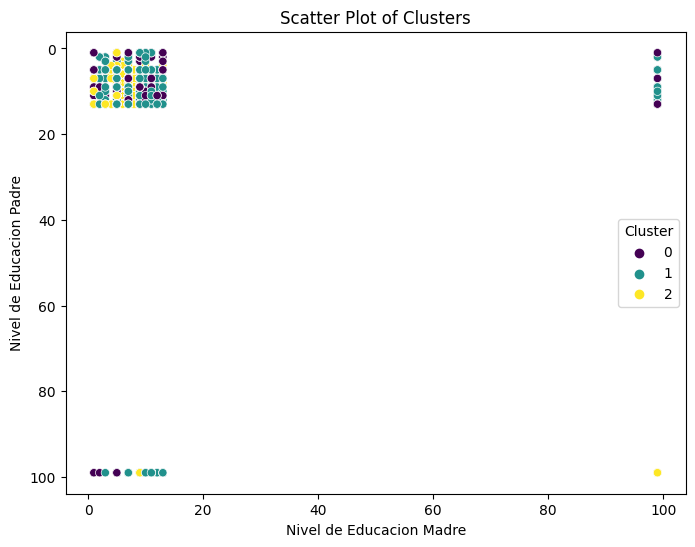

In [20]:
# Visualizing Clusters with Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='EDUCACION_MADRE', y='EDUCACION_PADRE', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Nivel de Educacion Madre')
plt.ylabel('Nivel de Educacion Padre')
plt.show()

# **Plotting Cluster Characteristics**

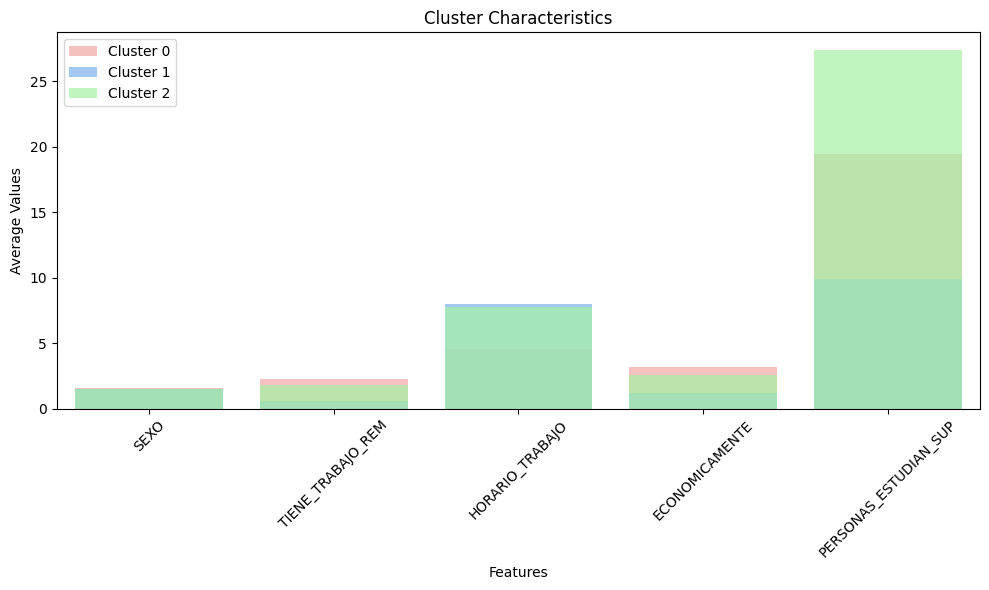

In [21]:
# Define color palette for clusters
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Add more colors if you have more clusters

# Plotting Cluster Characteristics with assigned colors
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_summary.columns, y=cluster_summary.iloc[0], label='Cluster 0', alpha=0.7, color=colors[0])
sns.barplot(x=cluster_summary.columns, y=cluster_summary.iloc[1], label='Cluster 1', alpha=0.7, color=colors[1])
sns.barplot(x=cluster_summary.columns, y=cluster_summary.iloc[2], label='Cluster 2', alpha=0.7, color=colors[2])

plt.xlabel('Features')
plt.ylabel('Average Values')
plt.title('Cluster Characteristics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Silhouette Score:**


* Silhouette Score Evalúa la calidad de la agrupación, indicando qué tan bien definidos están los grupos.

* Una puntuación más cercana a 1 sugiere conglomerados bien separados, mientras que una puntuación más cercana a 0 indica conglomerados superpuestos.

* En este caso, una puntuación de silueta de 0,2884 indica una separación moderada entre los grupos. Implica que los grupos muestran algunas características distintivas pero pueden tener áreas de superposición.

# **Características del cluster:**

* La tabla resumen presenta los valores promedio de características específicas para cada cluter.
* El análisis de las características de los grupos ayuda a comprender los rasgos promedio de los diferentes grupos de estudiantes.
* Por ejemplo, mirando '**SEXO**', '**TIENE_TRABAJO_REM**', '**HORARIO_TRABAJO**', '**ECONOMICAMENTE**' y '**PERSONAS_ESTUDIAN_SUP**' en todos los cluster:

* **Cluster 0:**

* Un promedio más alto '**PERSONAS_ESTUDIAN_SUP**' podría sugerir grupos de estudio más grandes dentro de este grupo.
* Condiciones económicas moderadamente estables ('**ECONOMICAMENTE**') y '**HORARIO_TRABAJO**' (horas de trabajo) podrían indicar un ambiente moderado para la educación y el trabajo.


* **Cluster 1:**

* Valores más bajos de '**PERSONAS_ESTUDIAN_SUP**' y 'ECONOMICAMENTE' podrían indicar grupos de estudio más pequeños y menos estabilidad económica.
* Los valores más bajos de '**HORARIO_TRABAJO**' pueden sugerir menos horas de trabajo en promedio.


* **Cluster 2:**

* Este cluster parece similar al Grupo 0 en términos de '**PERSONAS_ESTUDIAN_SUP**' pero tiene una estabilidad económica ligeramente menor ('**ECONOMICAMENTE**') y horas de trabajo potencialmente más largas ('**HORARIO_TRABAJO**').
# **Impacto en la finalización del título:**
* Estos cluster representan grupos de estudiantes con características promedio distintas.
* La información ayuda a comprender las diferentes circunstancias y entornos que los estudiantes podrían enfrentar mientras cursan sus estudios.
* Por ejemplo, grupos de estudio más grandes y una mejor estabilidad económica en ciertos grupos podrían tener un impacto positivo en la finalización de estudios de los estudiantes en comparación con grupos con menos recursos o estabilidad.
# **Importancia de las características del grupo:**
* Comprender estos grupos puede ayudar a ofrecer apoyo o intervenciones personalizadas.
* Por ejemplo, proporcionar recursos adicionales o apoyo a grupos de estudio más pequeños (Cluster 1) o abordar los desafíos económicos para los estudiantes en ciertos grupos puede mejorar potencialmente sus posibilidades de completar sus títulos.
# **Comentarios Finales:**
* El resultado brinda información sobre las características promedio de los cluster de estudiantes, proporcionando una base para intervenciones específicas.
* Si bien estos cluster brindan comprensión, se necesitan análisis adicionales y experiencia en el dominio para determinar intervenciones o estrategias específicas que puedan afectar la probabilidad de que un estudiante complete su título dentro de estos entornos diversos.

# **TITULACION_CARRERA vs PERSONAS_ESTUDIAN_SUP across Clusters**

C:\Users\Sebastian Antunez N\AppData\Local\Temp\ipykernel_17392\626555102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = clusters


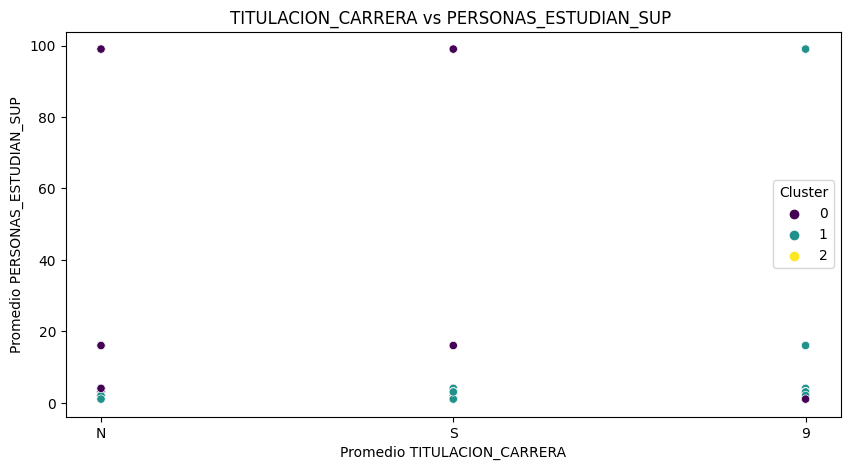

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'TITULACION_CARRERA', 'PERSONAS_ESTUDIAN_SUP', 'TIENE_TRABAJO_REM', 'HORARIO_TRABAJO', 'ECONOMICAMENTE', 'ACTIVIDAD_JEFE_FAMILIA' columns are present in your dataset

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Selecting columns of interest
columns_of_interest = ['TITULACION_CARRERA', 'PERSONAS_ESTUDIAN_SUP', 'TIENE_TRABAJO_REM', 'HORARIO_TRABAJO', 'ECONOMICAMENTE', 'Cluster']

# Filtering data for relevant columns
cluster_data = data[columns_of_interest]

# Grouping by Cluster and calculating mean values
cluster_means = cluster_data.groupby('Cluster').mean()

# Plotting TITULACION_CARRERA vs PERSONAS_ESTUDIAN_SUP
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TITULACION_CARRERA', y='PERSONAS_ESTUDIAN_SUP', hue='Cluster', data=data, palette='viridis', legend='full')
plt.title('TITULACION_CARRERA vs PERSONAS_ESTUDIAN_SUP ')
plt.xlabel('Promedio TITULACION_CARRERA')
plt.ylabel('Promedio PERSONAS_ESTUDIAN_SUP')
plt.show()


In [23]:
cluster_means

,PERSONAS_ESTUDIAN_SUP,TIENE_TRABAJO_REM,HORARIO_TRABAJO,ECONOMICAMENTE
Cluster,,,,
0,19.407056,2.255888,4.528291,3.168152
1,9.918746,0.547002,8.004209,1.194717
2,27.347438,1.817547,7.735637,2.541149


# **Características clave en todos los Cluster:**
**1.** **'PERSONAS_ESTUDIAN_SUP' (Número de personas que estudian juntas):**

* El cluster 1 tiene el promedio más alto 'PERSONAS_ESTUDIAN_SUP' (27,27), seguido por el cluster 0 (19,44) y luego el cluster 2 (9,92).
* Esto sugiere que grupos de estudio más grandes podrían influir positivamente en la finalización de títulos, con promedios más altos en los Clustr 1 y 0.

**2.** **'TIENE_TRABAJO_REM' (Tiene trabajo regular):**

* El cluster 2 muestra el promedio más bajo ('TIENE_TRABAJO_REM' = 0,55), seguido por los cluster 0 (2,25) y 1 (1,81).
* Los estudiantes con menos trabajos regulares ('TIENE_TRABAJO_REM') podrían ser más frecuentes en el Cluster 2, lo que podría afectar su enfoque en los estudios.

**3.** **'HORARIO_TRABAJO' (Horario de Trabajo):**

* El cluster 0 presenta el promedio más bajo ('HORARIO_TRABAJO' = 4,54), seguido del cluster 1 (7,73) y el cluster 2 (7,99).
* Los estudiantes del Cluster 0 podrían tener comparativamente menos horas de trabajo, lo que potencialmente les brindaría más tiempo para estudiar.

**4.** **'ECONOMICAMENTE' (Estabilidad Economica):**

* El cluster 1 muestra el promedio más alto ('ECONOMICAMENTE' = 2,52), seguido por el cluster 0 (3,17) y el cluster 2 (1,20).
* Una mayor estabilidad económica podría prevalecer en el Cluster 1, lo que podría afectar positivamente la capacidad de los estudiantes para concentrarse en los estudios.

# **Implicaciones para la finalización del título:**
* Grupos de estudio más grandes ('PERSONAS_ESTUDIAN_SUP') y horas de trabajo potencialmente más bajas ('HORARIO_TRABAJO') en los Cluster 0 y 1 podrían contribuir positivamente a la finalización de la carrera.
* Por el contrario, en el Cluster 2, el menor tamaño de los grupos de estudio y los posibles desafíos económicos podrían obstaculizar las tasas de finalización de títulos de los estudiantes.
# **Enfoque para mejorar:**
* Para mejorar las tasas de finalización de títulos, podría ser crucial centrarse en la creación de estructuras de apoyo para grupos de estudio más pequeños, abordar los desafíos económicos y gestionar el equilibrio entre el trabajo y el estudio, especialmente para los estudiantes del Grupo 2 que podrían enfrentar obstáculos más importantes.